Importing the MNIST digits dataset

In [30]:
import tensorflow as tf
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [12]:
import matplotlib.pyplot as plt
plt.style.use('classic')

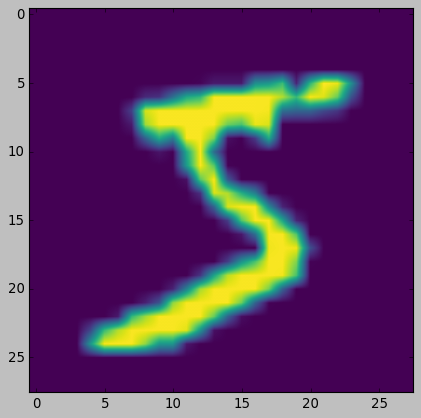

In [13]:
fig, ax = plt.subplots()
ax.imshow(x_train[0], cmap='viridis', interpolation=None)
plt.show()

First train a Simple Classifier on the dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

X = x_train.reshape(x_train.shape[0],-1)
y = y_train


X_tr, X_val, y_tr, y_val = train_test_split(X, y, stratify=y, test_size=0.25)




# clf = Pipeline([('pca', PCA(n_components=100)), 
#                 ('lr', LogisticRegression(multi_class="multinomial", max_iter=200))])

clf = Pipeline([('pca', PCA(n_components=100)), 
                ('lr', OneVsRestClassifier(SVC()))
                ])


clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_val)

print(f"Accuracy{accuracy_score(y_val,y_pred)}")

Accuracy0.9821333333333333


Now lets try a Neural Network

In [31]:
# Model architecture

model = tf.keras.Sequential([
     tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [32]:
# build model and set training objectives
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
# training
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2612 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1178 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0806 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0614 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0475 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0298 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0240 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0197 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.017

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.0798 - accuracy: 0.9791 - 424ms/epoch - 1ms/step

Test accuracy: 0.9790999889373779


Predict 

In [35]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [36]:
predictions = probability_model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [37]:
predictions[0].argmax()

7

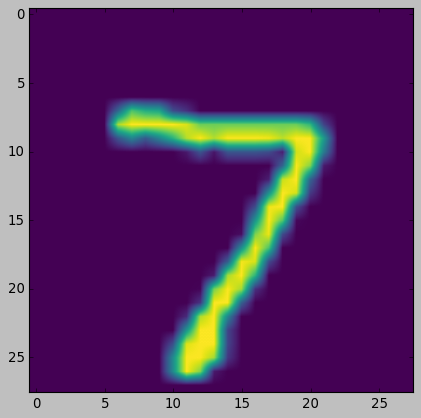

In [38]:
fig, ax = plt.subplots()
ax.imshow(x_test[0], cmap='viridis', interpolation=None)
plt.show()